# MonteCarlo Integration

Using MonteCarlo integration, check that

$I = \int_0^{\infty} dx \hspace{0.1 cm}  x^{3}\exp\left(-\frac{x^{2}}{2\sigma^2}\right) = 2\sigma^{4}$

$I = \sqrt{2\pi}\sigma \int_0^{\infty} dx \hspace{0.1 cm} x^3 \mathcal{G}(0,\sigma) \approx \sqrt{2\pi}\sigma \frac{1}{2N}\sum_{i=1}^{N} z_{i}^3$

with $z_i$ sampled from $\mathcal{G(x|0,\sigma)}$ with $x>0$

In [12]:
import numpy as np

In [65]:
sigma = 1 # Standard deviation of the Gaussian distribution

In [66]:
x = np.random.normal(0, sigma, int(N)) # sample N points from the Gaussian distribution
x = x[x>0]

In [67]:
z = x**3 # Evaluate f(x) in the extracted point x

In [68]:
I = np.sqrt(2*np.pi)*sigma*z.mean()/2 #compute the integral using the mean value theorem

In [69]:
print(I - 2*sigma**4) #Residual of the integral

-0.009177273966332278


Let's see if the result converges as $N \to \infty$

In [104]:
Ns = np.power(10, np.linspace(1, 6, 1000))

In [105]:
def compute_integral(N):
    x = np.random.normal(0, sigma, int(N))
    x = x[x>0]
    z = x**3
    return np.sqrt(2*np.pi)*sigma*z.mean()/2

In [106]:
result = []
for N in Ns:
    result.append(compute_integral(N))

In [107]:
import matplotlib.pyplot as plt

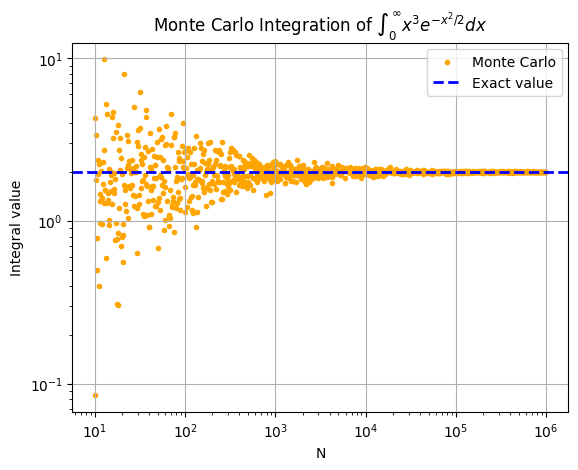

In [108]:
plt.scatter(Ns, result, marker='.', color='orange',label='Monte Carlo')
plt.axhline(2*sigma**4, color='blue', label='Exact value', linestyle='--', linewidth=2)
plt.loglog()
plt.xlabel('N')
plt.ylabel('Integral value')
plt.title('Monte Carlo Integration of $\\int_0^\\infty x^3 e^{-x^2/2} dx$')
plt.legend()
plt.grid()

We can see that as the number of extracted numbers increases, the result of the MonteCarlo simulation converges to the real result.\
What happens if we do the computation with a fixed (high) value of extractions for a number of trials and plot the distribution as a function of the number of trials?

In [165]:
trials = np.linspace(1, 100, 10, dtype=int)

In [166]:
dist = []
for i, trial in enumerate(trials):
    print(f"Running {trial} × 100 integrals...")
    n_integrals = (trial - trials[i - 1]) * 100 if i > 0 else trial * 100
    temp = [compute_integral(int(1e5)) for _ in range(n_integrals)]
    dist.append(temp + dist[i - 1] if i > 0 else temp)

Running 1 × 100 integrals...
Running 12 × 100 integrals...
Running 23 × 100 integrals...
Running 34 × 100 integrals...
Running 45 × 100 integrals...
Running 56 × 100 integrals...
Running 67 × 100 integrals...
Running 78 × 100 integrals...
Running 89 × 100 integrals...
Running 100 × 100 integrals...


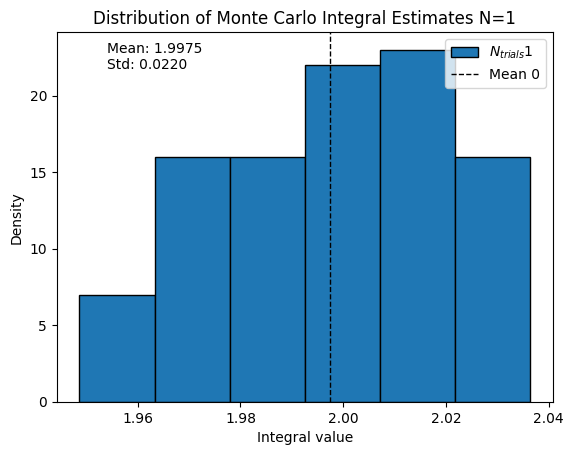

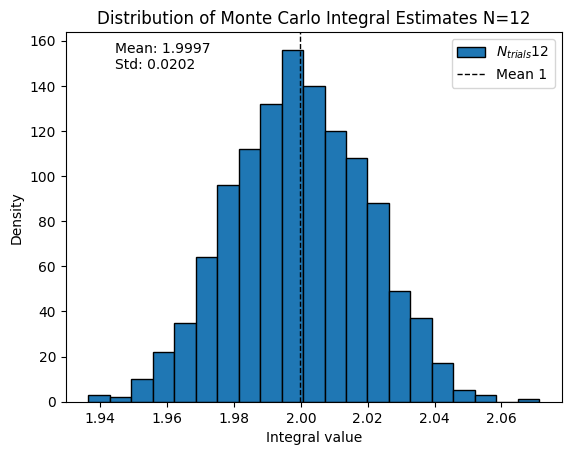

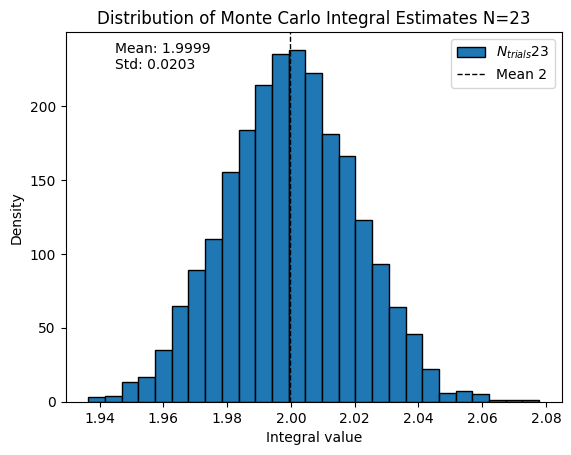

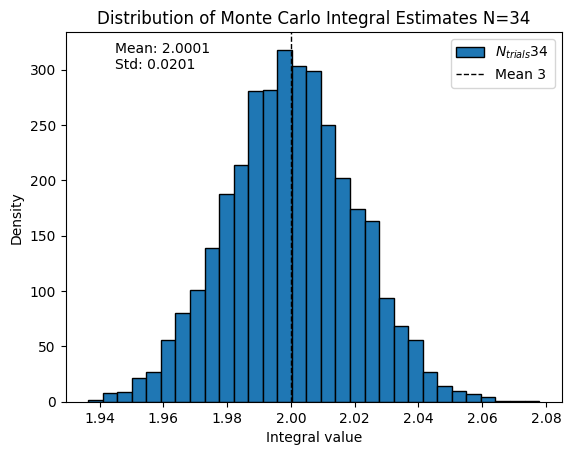

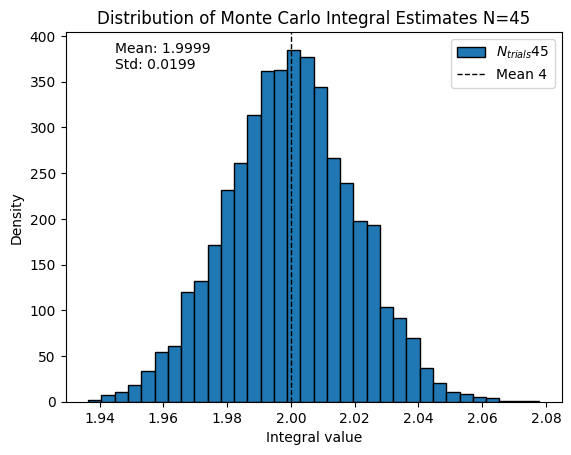

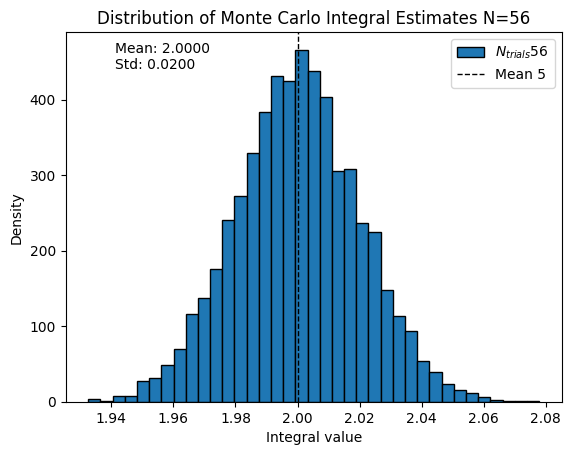

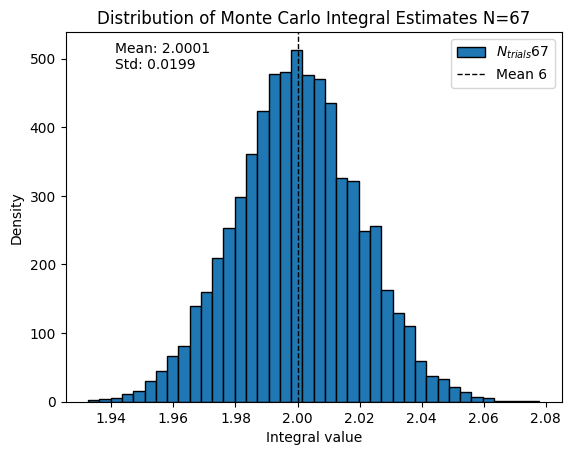

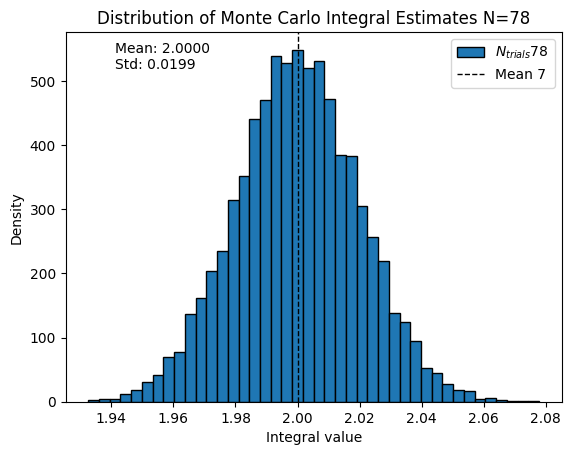

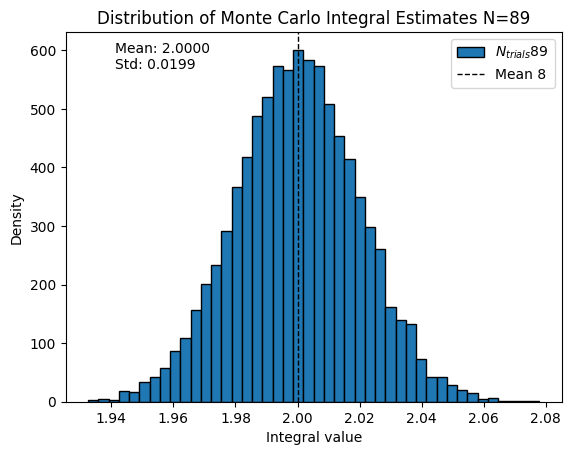

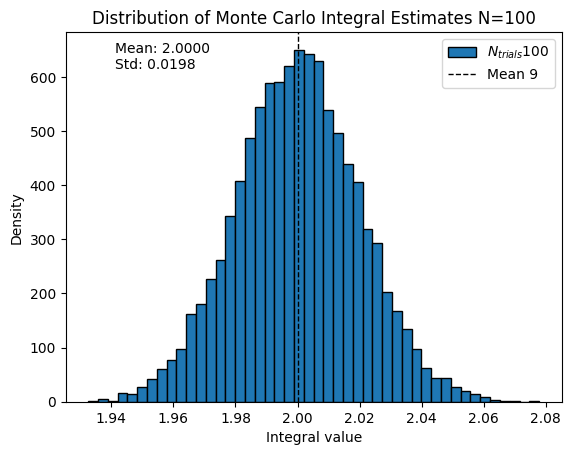

In [174]:
for i,trial in enumerate(trials):
    plt.hist(dist[i], bins='scott', label=r'$N_{trials}$'+f'{int(trial)}', density=False, edgecolor='black')
    plt.axvline(np.mean(dist[i]), color='black', linestyle='--', linewidth=1, label=f'Mean {int(i)}')
    plt.title(f'Distribution of Monte Carlo Integral Estimates N={trial}')
    plt.text(0.1, 0.9, f'Mean: {np.mean(dist[i]):.4f}\nStd: {np.std(dist[i]):.4f}', transform=plt.gca().transAxes)
    plt.xlabel('Integral value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [175]:
means = [np.mean(d) for d in dist]
stds = [np.std(d) for d in dist]

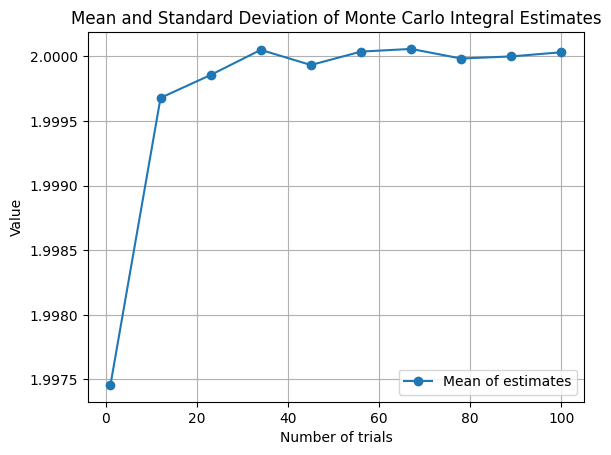

In [176]:
plt.plot(trials, means, marker='o', label='Mean of estimates')
plt.xlabel('Number of trials')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation of Monte Carlo Integral Estimates')
plt.legend()
plt.grid()

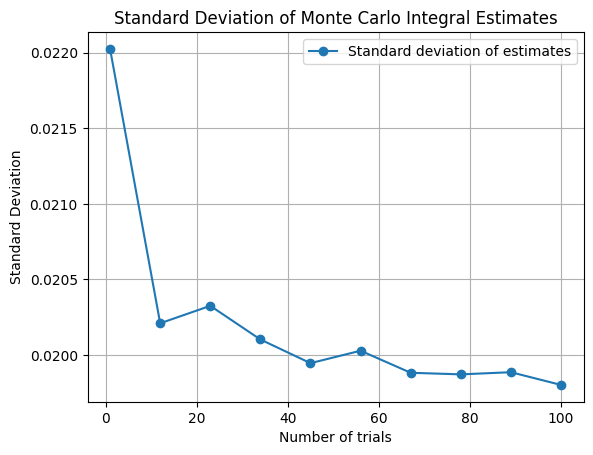

In [177]:
plt.plot(trials, stds, marker='o', label='Standard deviation of estimates')
plt.xlabel('Number of trials')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Monte Carlo Integral Estimates')
plt.legend()
plt.grid()


As suggested by the central limit theorem, the distribution of the random variable $X =$"Integral value" tends to become a Gaussian with mean $\mu \to 2$ and standard deviation $\sigma \to 0$